# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [113]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Display all graphs
%matplotlib inline

### Understanding the structure of the data

In [114]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
# Write your code here to read the data
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Course/foodhub_order.csv')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [116]:
# Write your code here to view the first 5 row
foodhub_records = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Course/foodhub_order.csv')
foodhub_records.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [117]:
# Write your code here
print('There are', foodhub_records.shape[0], 'rows in the dataset')
print('There are', foodhub_records.shape[1], 'columns in the dataset')

There are 1898 rows in the dataset
There are 9 columns in the dataset


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [118]:
# Write your code here
foodhub_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [119]:
#Probing Rating Column for Unknowns
foodhub_records['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [120]:
#Probing day_of_the_week column for missing values
foodhub_records['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [121]:
#Probing cuisine_type column for missing values
foodhub_records['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [122]:
#Probing restaurant_name for missing values
foodhub_records['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

#### Observation
There are no missing values in the data

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [123]:
# Write your code here
foodhub_records.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations
It takes an average of 27 minutes for the food to be prepared once the order is placed. The least time it has taken for this to happen is 20 minutes while the longest time it has taken for this to happen is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [124]:
foodhub_records['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


736 orders have not been Rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

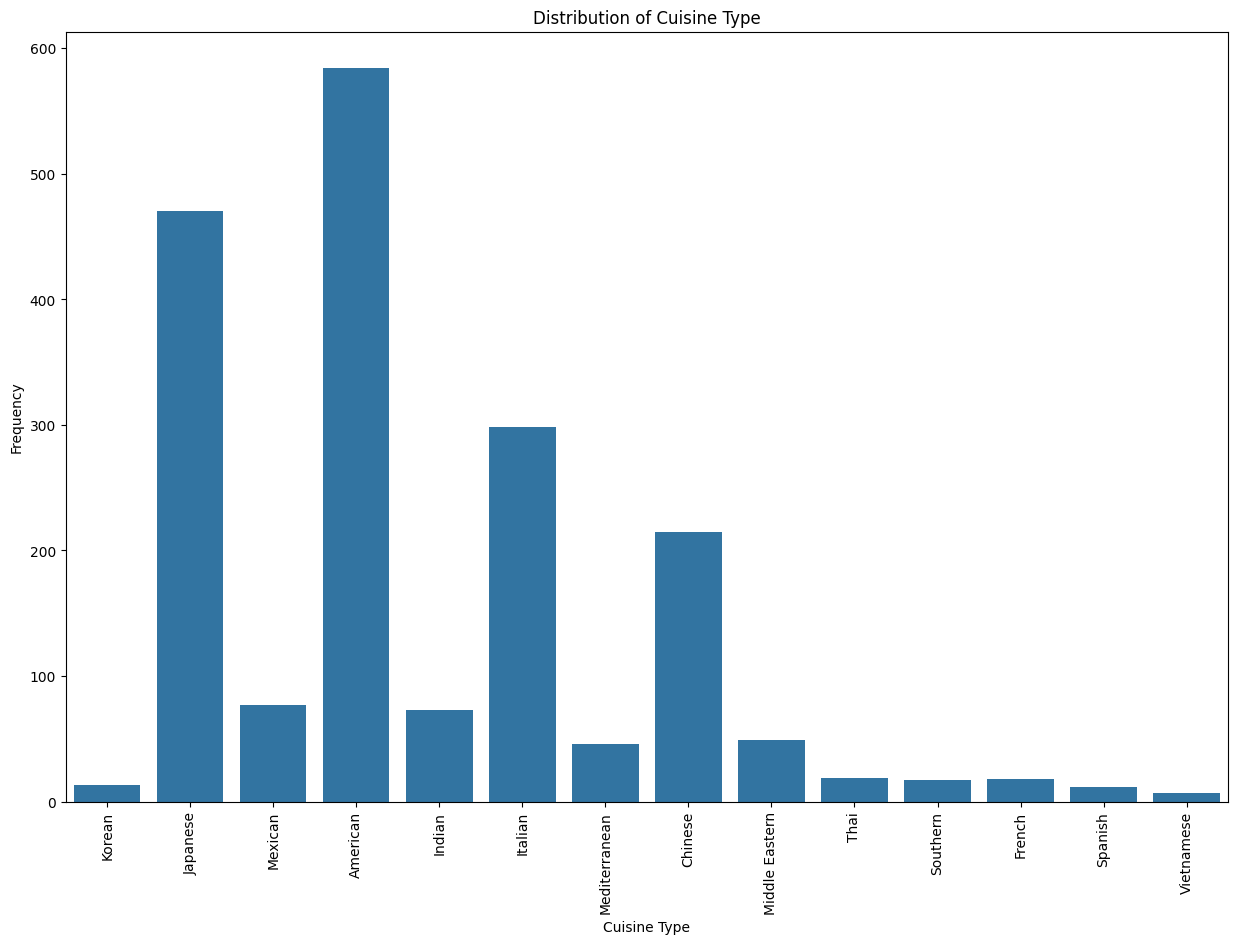

In [125]:
# Write the code here
plt.figure(figsize=(15,10))
plt.title('Distribution of Cuisine Type')#Set Title
sns.countplot(data=foodhub_records, x='cuisine_type');#Plot countplot
plt.xticks(rotation=90);# Set x axis label to 90 degress orientation
plt.xlabel('Cuisine Type');# Set x axis label Name
plt.ylabel('Frequency');# Set y axis label Name

#### Observation:
* The cuisen most prefered by customers:

    1. American Cuisine
    2. Japanese Cuisine
    3. Italian Cuisine
    4. Chinese Cuisine
    5. Mexican & Indian Cuisine

* All other cuise types have ralatively lower patronage.
* The data is right skewed.

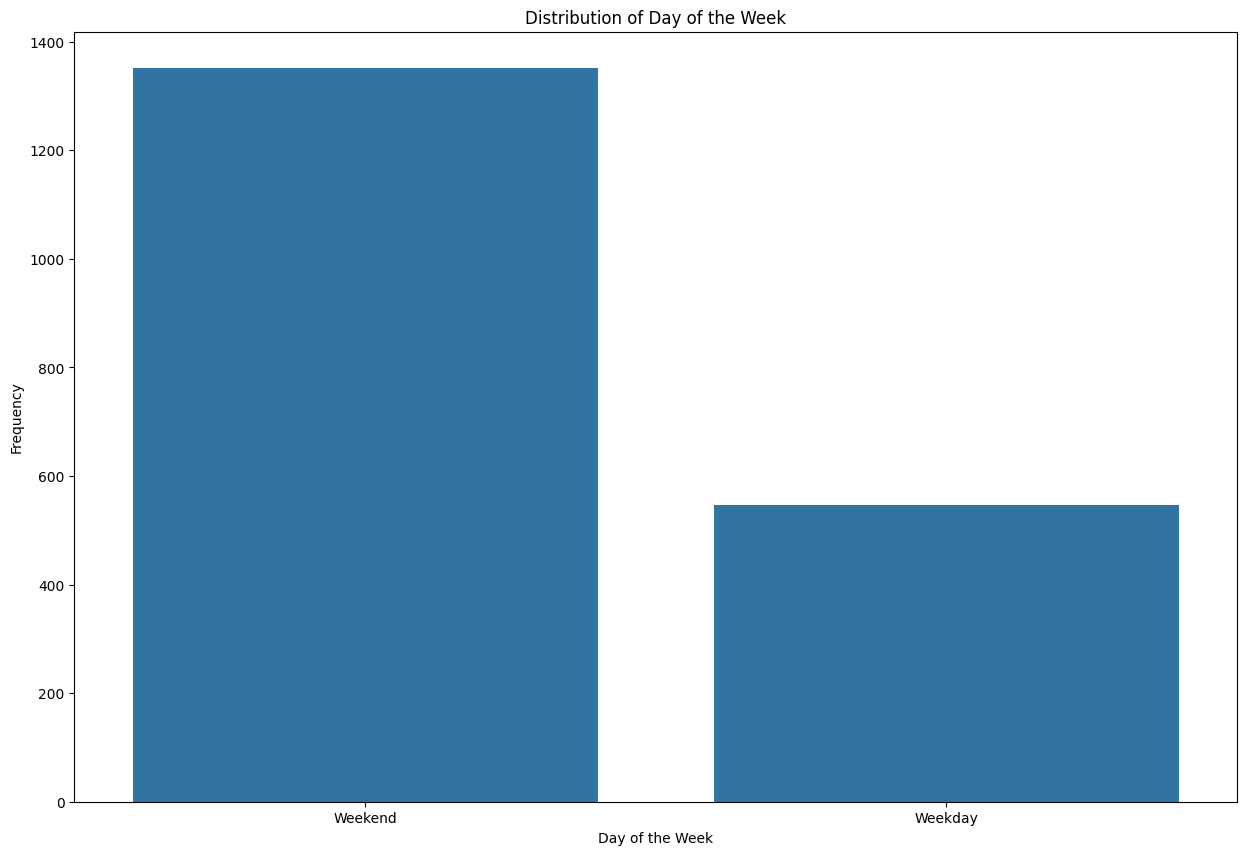

In [126]:
#Confirming the order frequency according to day of the week.
plt.figure(figsize=(15,10))
plt.title('Distribution of Day of the Week')
sns.countplot(data=foodhub_records, x='day_of_the_week');
plt.xlabel('Day of the Week');
plt.ylabel('Frequency');

#### Observation
* Most of the orders were made on the weekend
* This may suggest that customers would want to take a break from their hectic lifestyle and enjoy some leisure activities like parties, movies etc, hence the reason why majority of the orders are on the weekends.

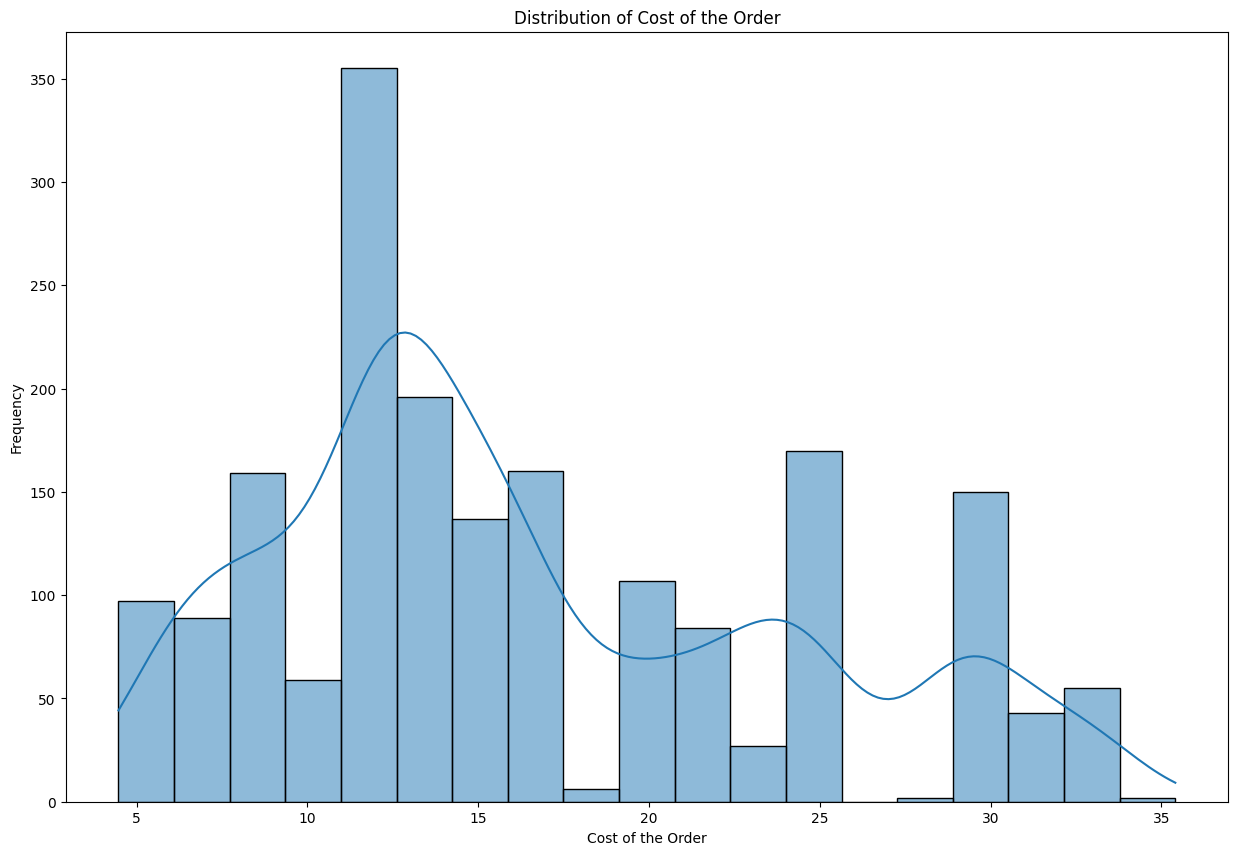

In [127]:
#Probing the cost of order
plt.figure(figsize=(15,10))
plt.title('Distribution of Cost of the Order')
sns.histplot(data=foodhub_records, x='cost_of_the_order', kde=True);
plt.xlabel('Cost of the Order');
plt.ylabel('Frequency');

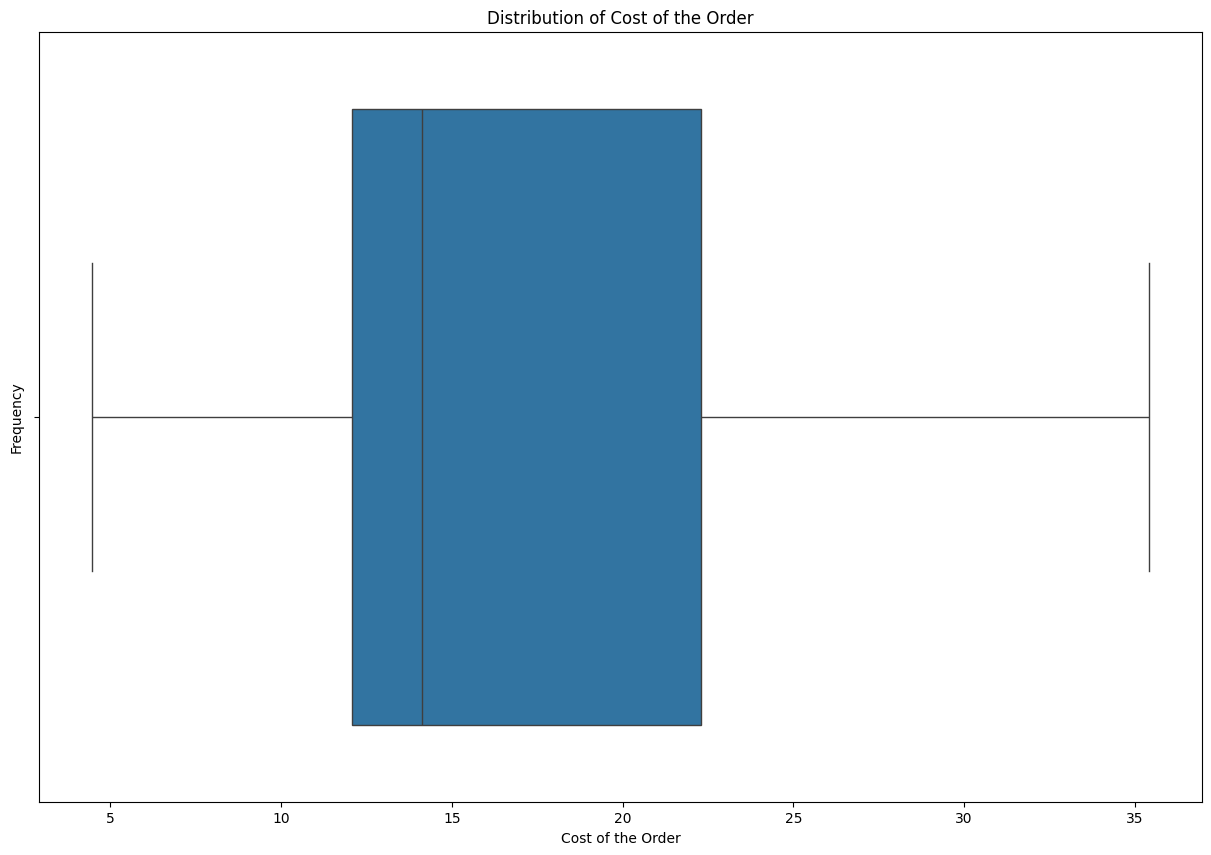

In [128]:
# Analyzing Cost of Order using Box Plot
plt.figure(figsize=(15,10))
plt.title('Distribution of Cost of the Order')
sns.boxplot(data=foodhub_records, x='cost_of_the_order');
plt.xlabel('Cost of the Order');
plt.ylabel('Frequency');

#### Observation
* The data is
right skewed.
* 50% of the order cost is below 14 dollars.
* The cheapest order is about 4 dollars.
* The most expensive order is 35 dollars.
* Majority of the orders are less than 25 dollars but greater than 10 dollars.

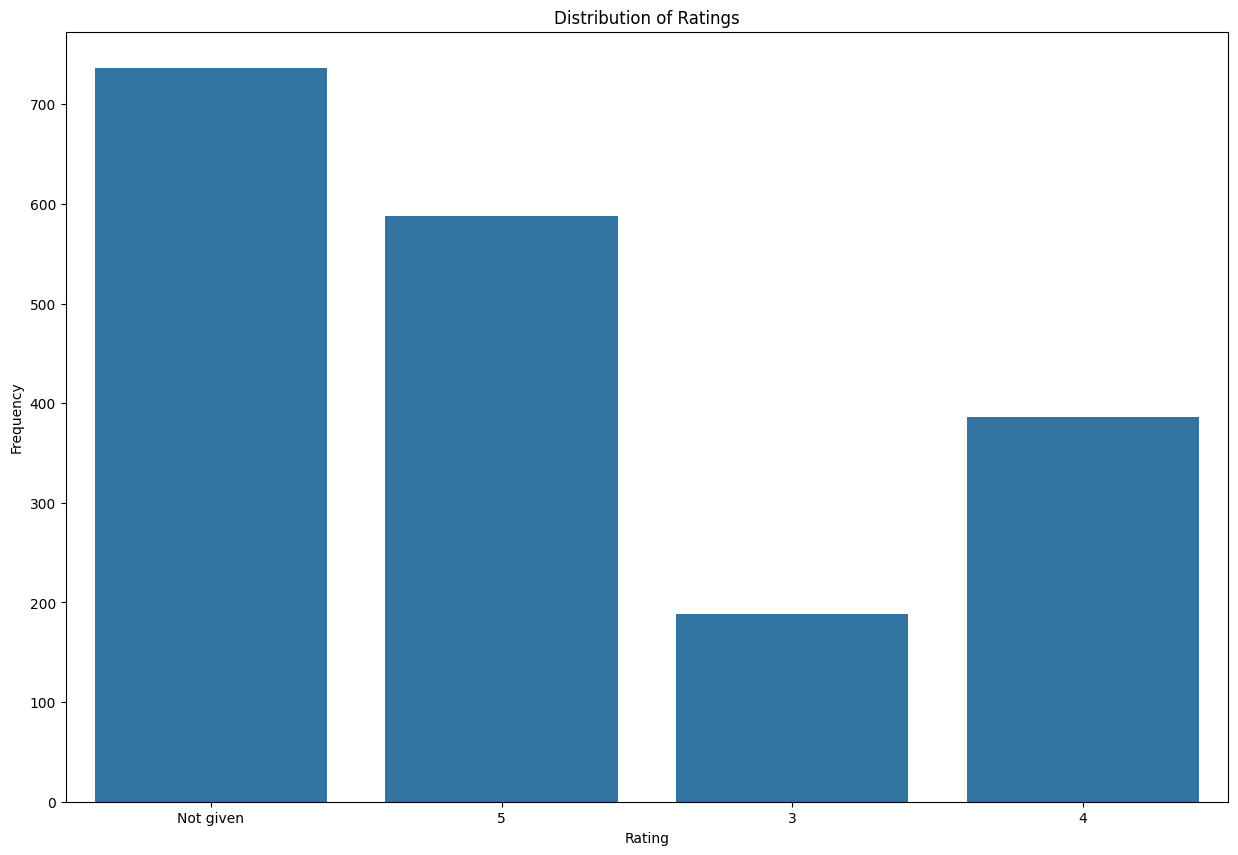

In [129]:
#Probing Customer Ratings
plt.figure(figsize=(15,10))
plt.title('Distribution of Ratings')
sns.countplot(data=foodhub_records, x='rating');
plt.xlabel('Rating');
plt.ylabel('Frequency');

#### Observation
* The data is left skewed.
* The least rating is 3
* The highest rating is Not given.
* The customer rating process must be reviewed since majority of the customers didn't leave a rating.

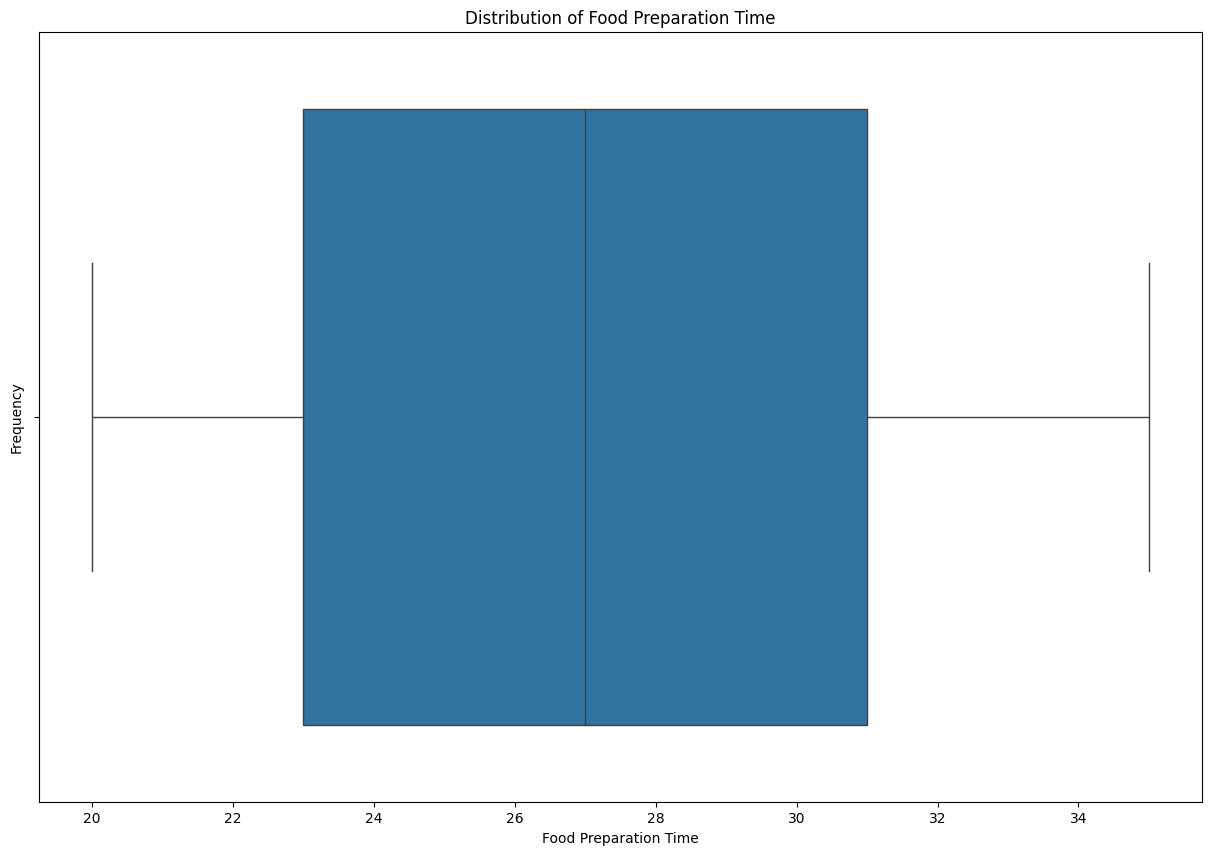

In [130]:
#Probing Food Prepartion Time
plt.figure(figsize=(15,10))
plt.title('Distribution of Food Preparation Time')
sns.boxplot(data=foodhub_records, x='food_preparation_time');
plt.xlabel('Food Preparation Time');
plt.ylabel('Frequency');

#### Observation
* The data is normally distributed.
* There are no outliers present which suggests that the data is well within range.
* The least time spent preparing food is 20 minutes.
* The longest time spent preparing food is about 35 minutes.

#### Observation


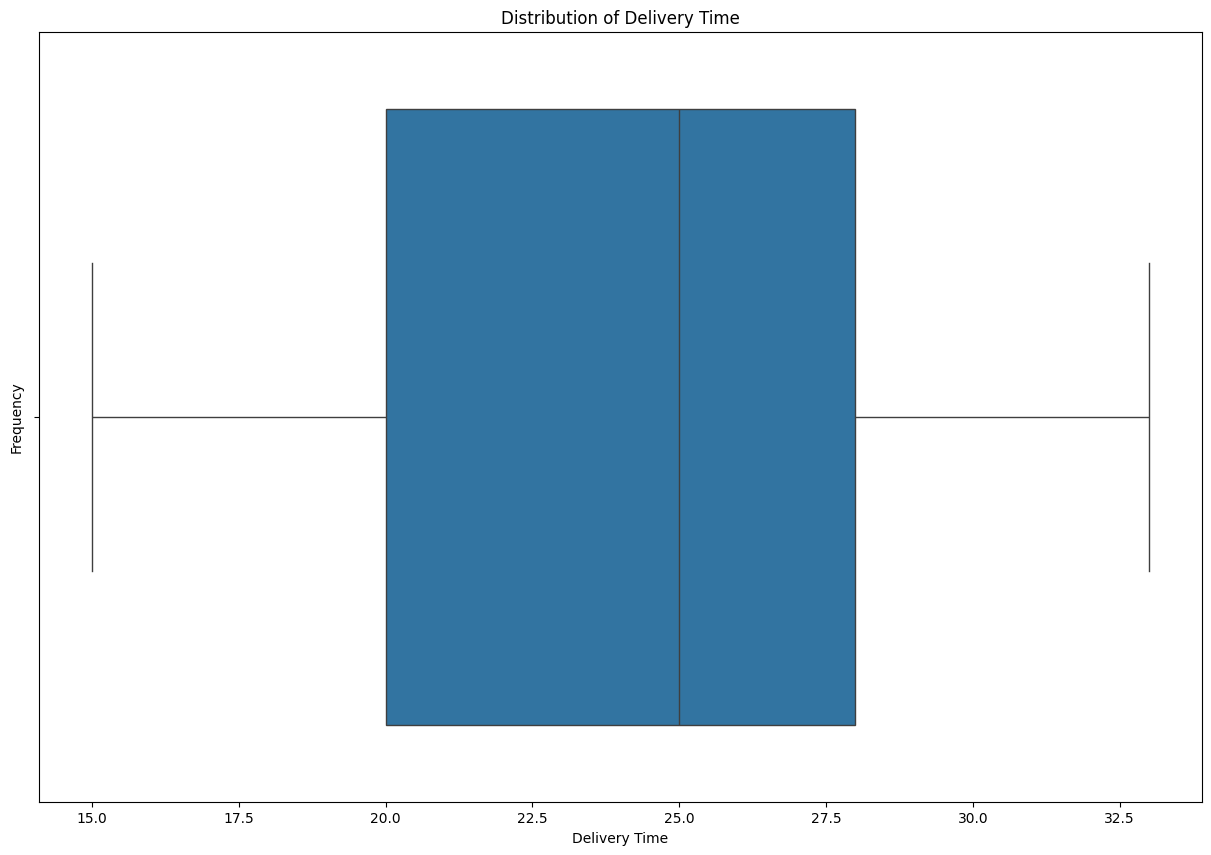

In [131]:
#Probing Delivery Time
plt.figure(figsize=(15,10))
plt.title('Distribution of Delivery Time')
sns.boxplot(data=foodhub_records, x='delivery_time');
plt.xlabel('Delivery Time');
plt.ylabel('Frequency');

#### Observation
* Data is normally distributed. There appears to be no outliers.
* Half of the data suggest that majority of the orders were delivered in under 25 minutes.
* The longest delivery time was about 35 minutes.
* 75% percent of the data were delivered in under 30 minutes.

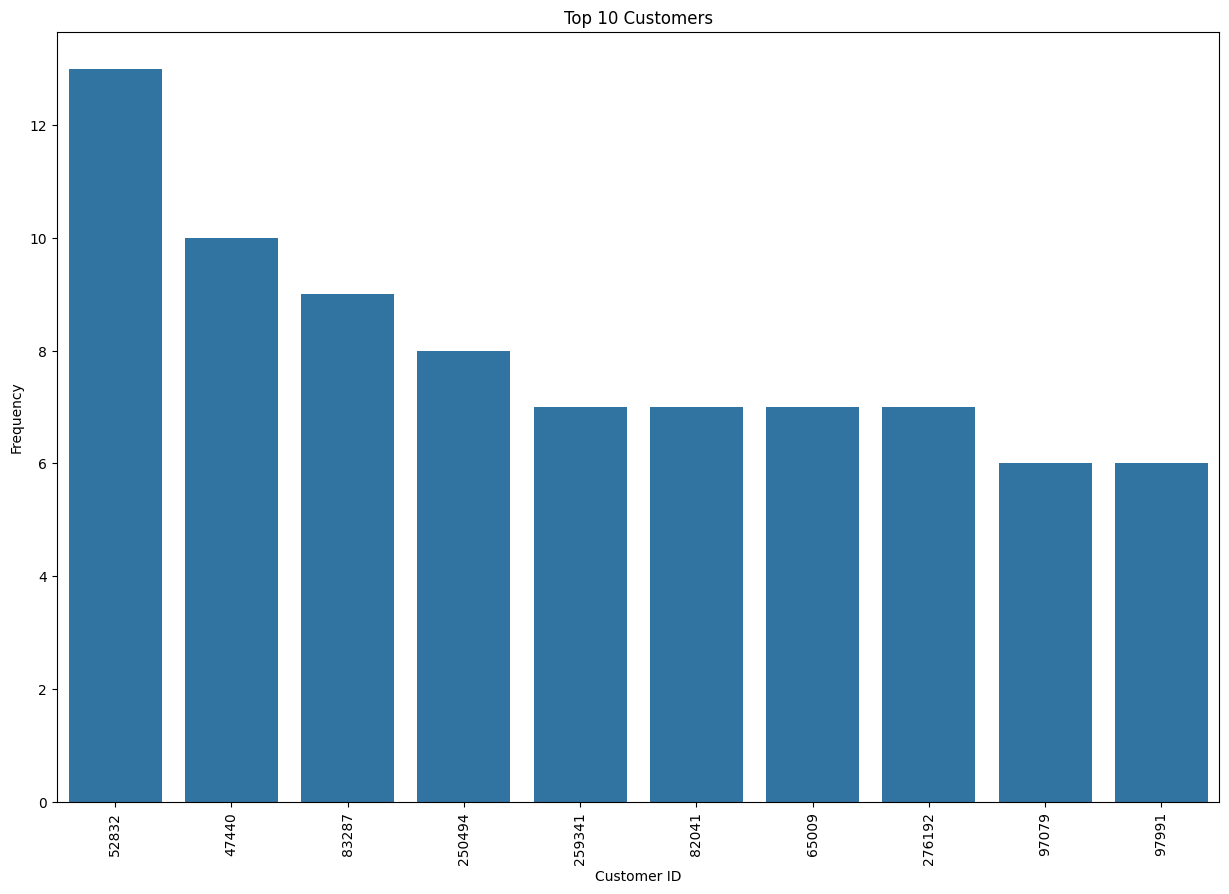

In [132]:
#Checking for the top 10 most frequent custormers
plt.figure(figsize=(15,10))
plt.title('Top 10 Customers')
plt.xticks(rotation=90)
sns.countplot(data=foodhub_records, x='customer_id', order=foodhub_records['customer_id'].value_counts().iloc[:10].index);
plt.xlabel('Customer ID');
plt.ylabel('Frequency');

#### Observation
* The above shows a graph of the Top 10 customers that patronize the Foodhub for orders. These customers should considered priority in order to further expand the operations of foodhub in the near future.
* The data is right skewed and this is only a small section of about 1800 customers.

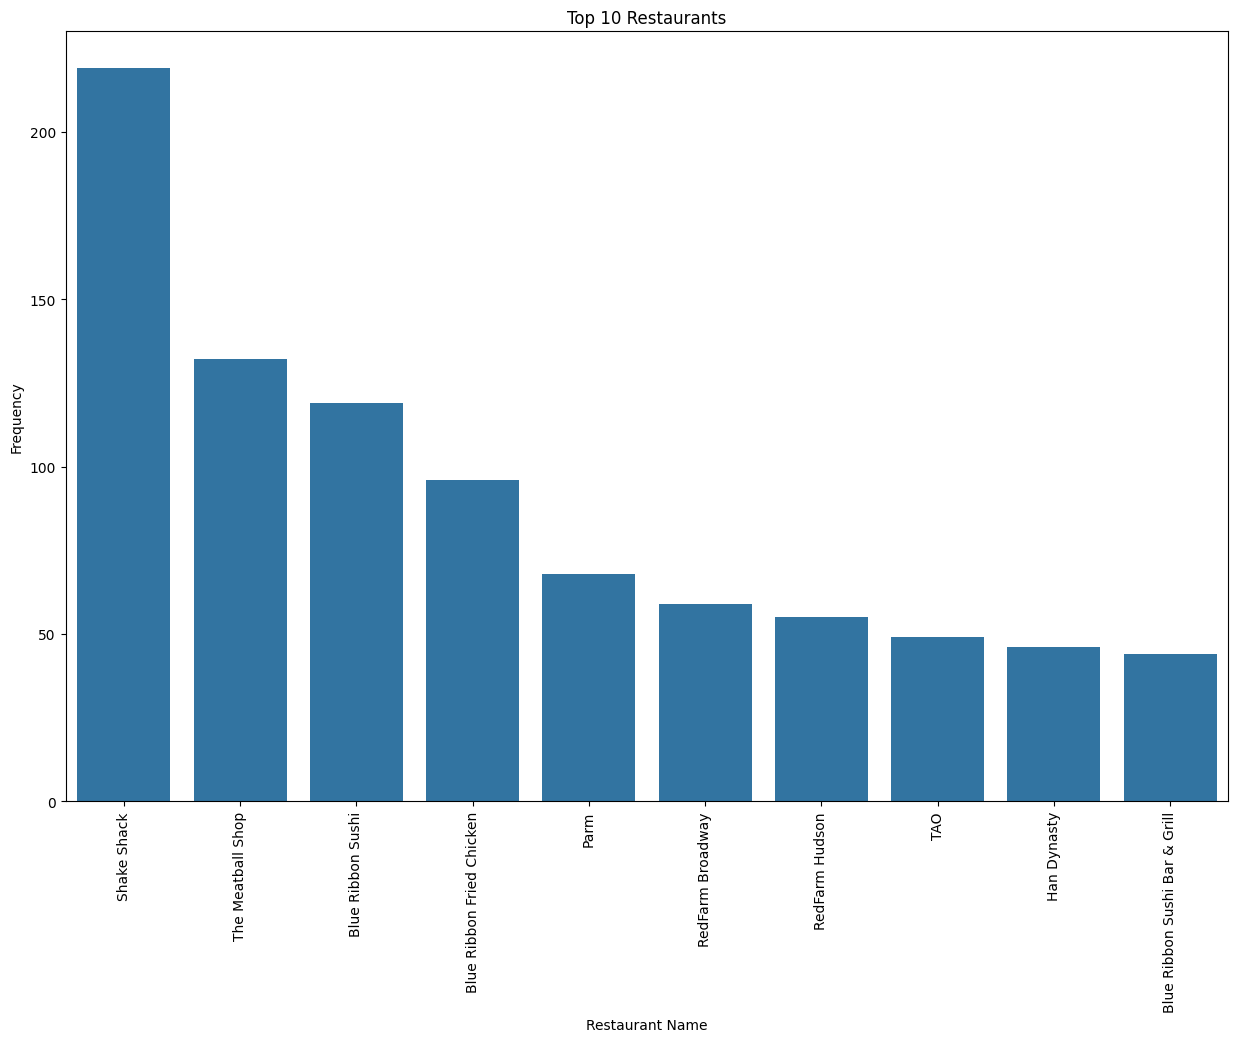

In [133]:
#Checking for the top 10 most patornized Restaurants
plt.figure(figsize=(15,10))
plt.title('Top 10 Restaurants')
plt.xticks(rotation=90)
sns.countplot(data=foodhub_records, x='restaurant_name', order=foodhub_records['restaurant_name'].value_counts().iloc[:10].index);
plt.xlabel('Restaurant Name');
plt.ylabel('Frequency');

#### Observation
* The above depicts a graph of the top 10 most patronized restaurants. With Shake Shack being the first with the highest order count, followed by The Meatball Shop and Blue Ribbon Sushi.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [134]:
# Write the code here
pd.DataFrame({'Restaurant Name': foodhub_records['restaurant_name'].value_counts().iloc[:5].index, 'Number of Orders':foodhub_records['restaurant_name'].value_counts().iloc[:5].values})

,Restaurant Name,Number of Orders
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observation:
The top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [135]:
# Write the code here
foodhub_records.groupby('day_of_the_week')['cuisine_type'].value_counts().loc['Weekend']

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


#### Observations:
The American Cuisine is the most popular on weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [136]:
# Write the code here
foodhub_records[foodhub_records['cost_of_the_order'] > 20].shape[0]/foodhub_records.shape[0]*100

29.24130663856691

#### Observations:
29% of the orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [137]:
# Write the code here
foodhub_records['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean delivery time is 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [138]:
# Write the code here
foodhub_records['customer_id'].value_counts().iloc[:3]

,count
customer_id,
52832,13
47440,10
83287,9


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [139]:
# New Variable: Food Waiting Time
foodhub_records['food_waiting_time'] = foodhub_records['delivery_time'] + foodhub_records['food_preparation_time']
foodhub_records.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,food_waiting_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [140]:
foodhub_records['food_waiting_time'].describe()

,food_waiting_time
count,1898.000000
mean,51.533720
std,6.833603
min,35.000000
25%,47.000000
50%,52.000000
75%,56.000000
max,68.000000


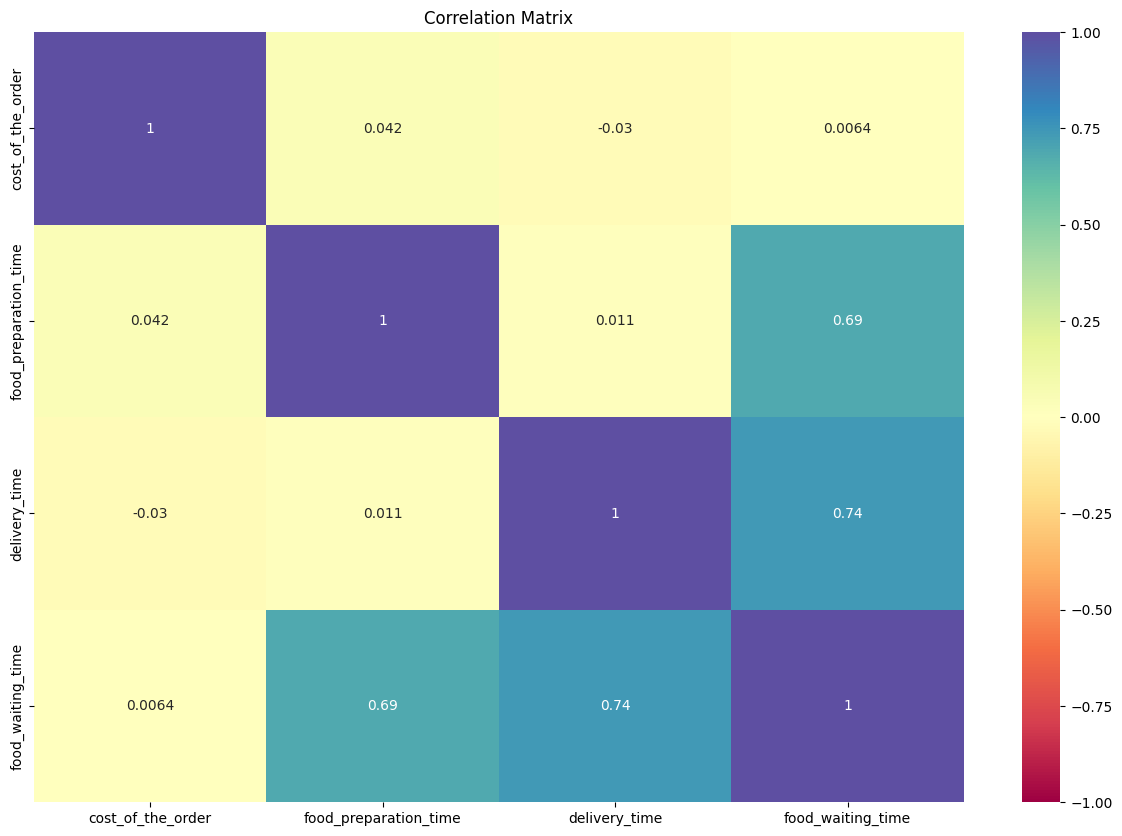

In [141]:
# Creating Variable for Numeric Columns
numeric_columns = foodhub_records.select_dtypes(include=np.number) #Selecting numeric columns from foodhub_records
numeric_columns = numeric_columns.drop(columns=['order_id', 'customer_id'], axis=1) #Dropping order_id and customer_id

# Creating Correlation Matrix for Numberic Values
plt.figure(figsize=(15,10))
plt.title('Correlation Matrix')
sns.heatmap(numeric_columns.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1);

#### Observation
* Food waiting time shows a strong positive correlation with food prepartion time and food delivery time.
* There is little to no correlation between the rest of the numeric variables.


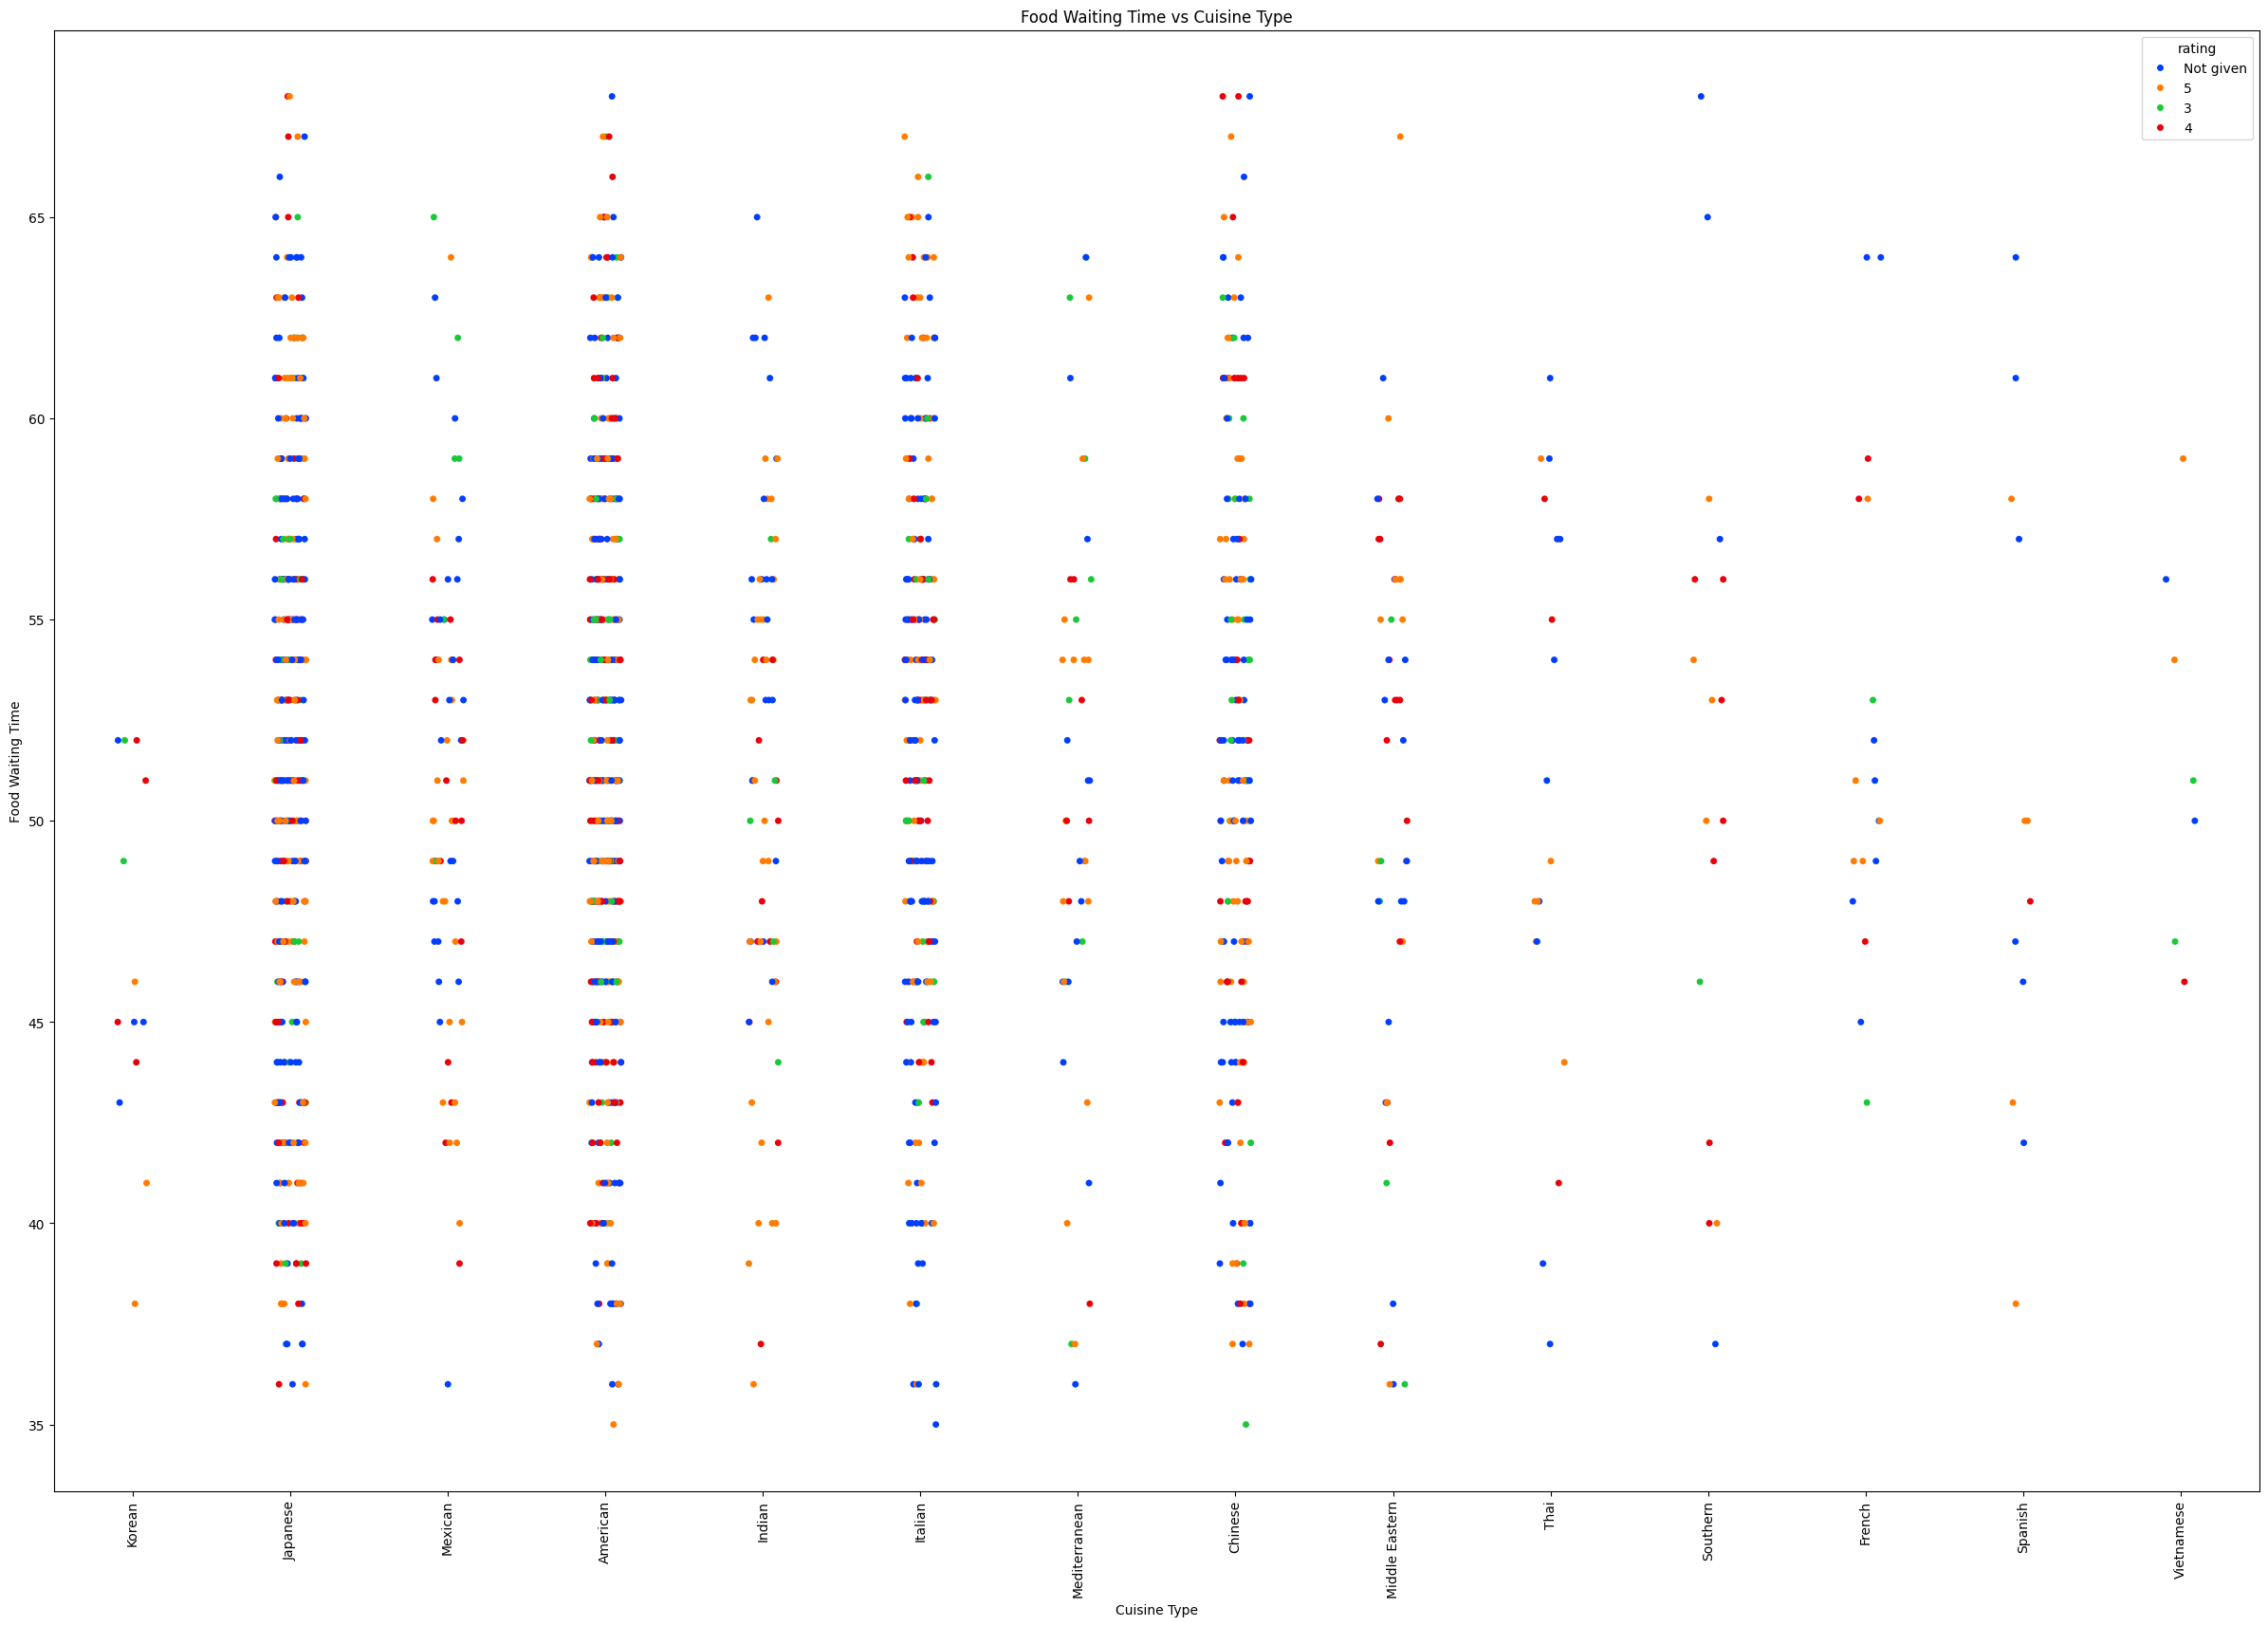

In [142]:
#Analyzing relationship between the food waiting time, customer ratings and cuisine type
plt.figure(figsize=(30,20))
plt.title('Food Waiting Time vs Cuisine Type')
plt.xticks(rotation=90);
plt.xlabel('Cuisine Type');
plt.ylabel('Food Waiting Time');
sns.stripplot(data=foodhub_records, x='cuisine_type', y='food_waiting_time', hue='rating', palette='bright', jitter=True, size=5);

#### Observation
* Japanese, American, Italian and Chinese Cuisines have the most ratings.
* The above mentioned cuisines have the most satisfied customers.
* Customers are satisfied with these cusines regardless of the time they receive them.
* The plot also shows one unsatisfied customer who recieved a chinese cuisine early at the 35 minute mark
* Majority of the customers didn't bother to leave a rating. This could suggest a neutral satisfaction or there a tiduos rating process or the customers simply didn't have the time.

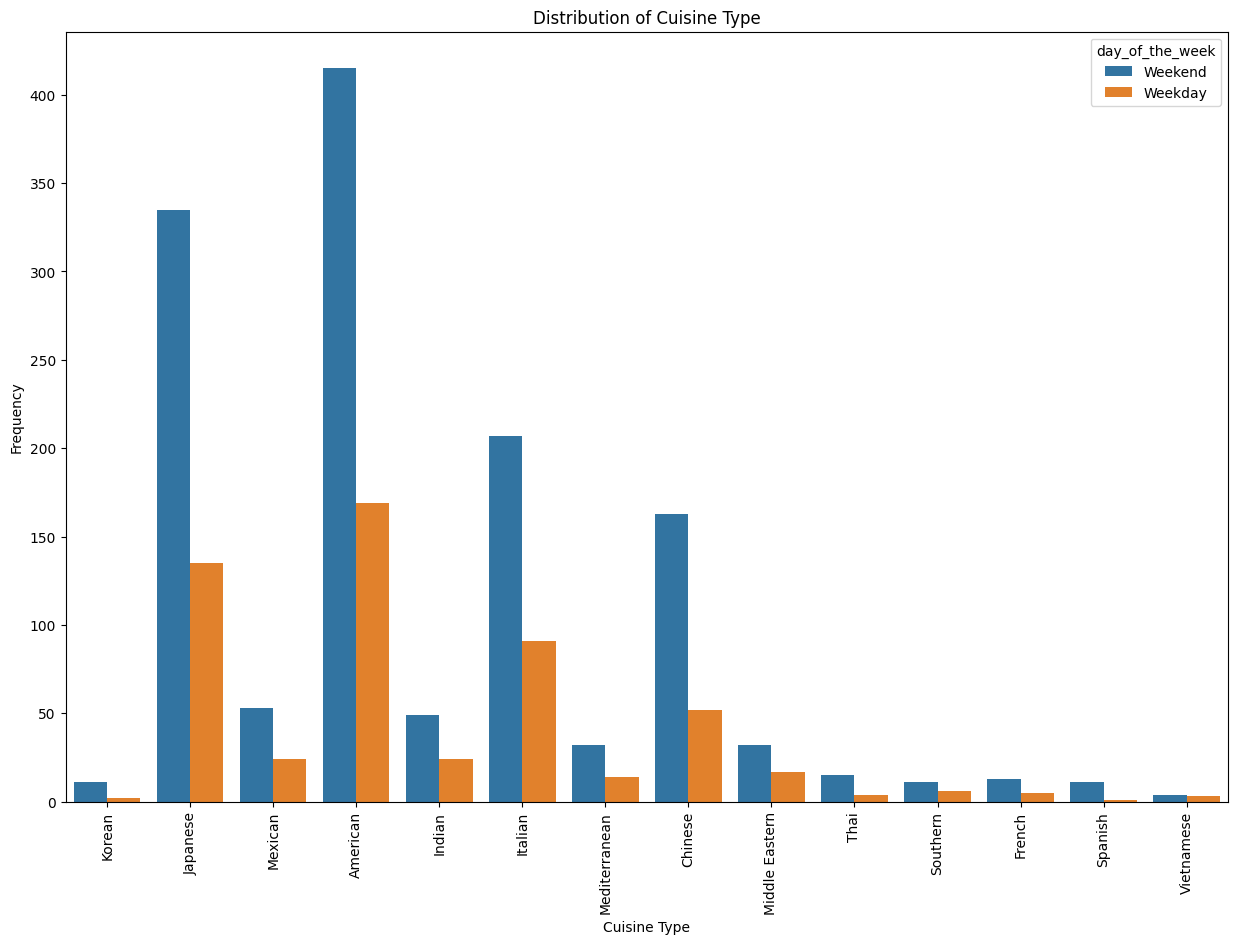

In [143]:
#Analyzing cuizine type and day of the week
plt.figure(figsize=(15,10))
plt.title('Distribution of Cuisine Type')
sns.countplot(data=foodhub_records, x='cuisine_type', hue='day_of_the_week');
plt.xticks(rotation=90);
plt.xlabel('Cuisine Type');
plt.ylabel('Frequency');

* The distribution is right skewed
* Most orders come during the weekends.
* The American Cuisine has the highest frequency of orders, followed by japanese and Italian.

#### Grouping Order Cost according to bins
* 0 - 5 = Very Affordable
* 5 - 10 = Affordable
* 10 - 15 = Moderately Affordable
* 15 - 20 = Fairly Affordable
* 20 - 25 = Somewhat Expensive
* 25 - 30 = Expensive
* 30 - 35 = Very Expensive

This is to give an idea of what customers would consider affordable.

In [144]:
#Grouping Cost of Order in Bins
foodhub_records['cost_of_order_bins'] = pd.cut(foodhub_records['cost_of_the_order'], bins=[0,5,10,15,20,25,30,35], labels=['Very Affordable', 'Affordable', 'Moderately Affordable', 'Fairly Affordable', 'Somewhat Expensive', 'Expensive', 'Very Expensive'], right=False)

In [145]:
foodhub_records.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,food_waiting_time,cost_of_order_bins
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45,Very Expensive
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48,Moderately Affordable
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51,Moderately Affordable
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40,Expensive
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49,Moderately Affordable


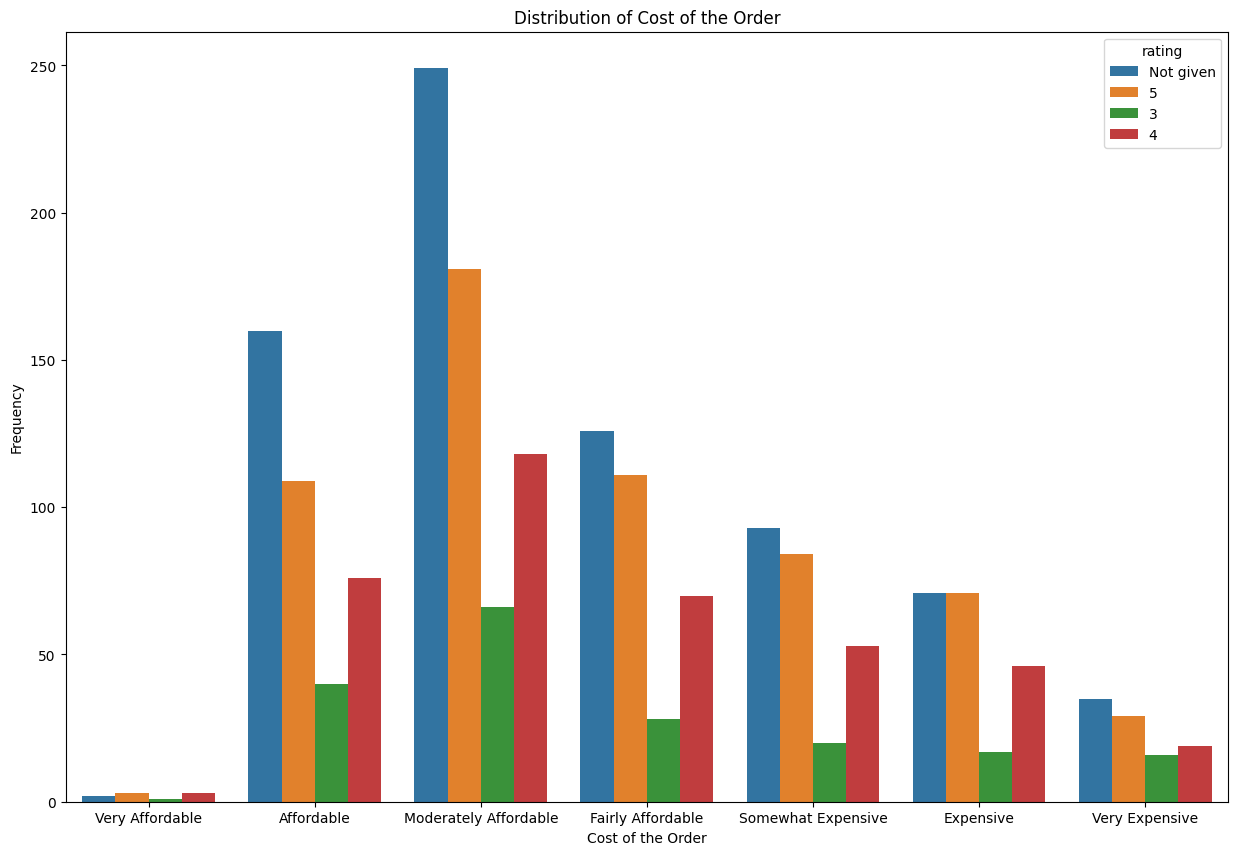

In [146]:
#Analyzing the Order Distribution using a countplot
plt.figure(figsize=(15,10))
plt.title('Distribution of Cost of the Order')
sns.countplot(data=foodhub_records, x='cost_of_order_bins', hue='rating');
plt.xlabel('Cost of the Order');
plt.ylabel('Frequency');

#### Observation
* Majority of the orders were between 10 - 15 dollars which is considered to be moderately affordable for customers.
* The distribution is right skewed.
* Very few customers choose foods which were very affordable.
* This implies that foodhub must concentrate more of the advertisement on foods that fit the price range stated above.

In [147]:
pd.DataFrame({
       'Number of Orders': foodhub_records.groupby('cost_of_order_bins', observed=False)['cost_of_the_order'].count(),# Creating Number of Orders Column
       'Total Revenue': foodhub_records.groupby('cost_of_order_bins', observed=False)['cost_of_the_order'].sum() # Creating Total Revenue Column
   })

,Number of Orders,Total Revenue
cost_of_order_bins,,
Very Affordable,9,42.74
Affordable,385,2971.70
Moderately Affordable,614,7854.05
Fairly Affordable,335,5691.42
Somewhat Expensive,250,5746.25
Expensive,205,5773.31
Very Expensive,99,3199.94


#### Observation
* Customers bought 7854.05 dollars worth of orders through Foodhub.

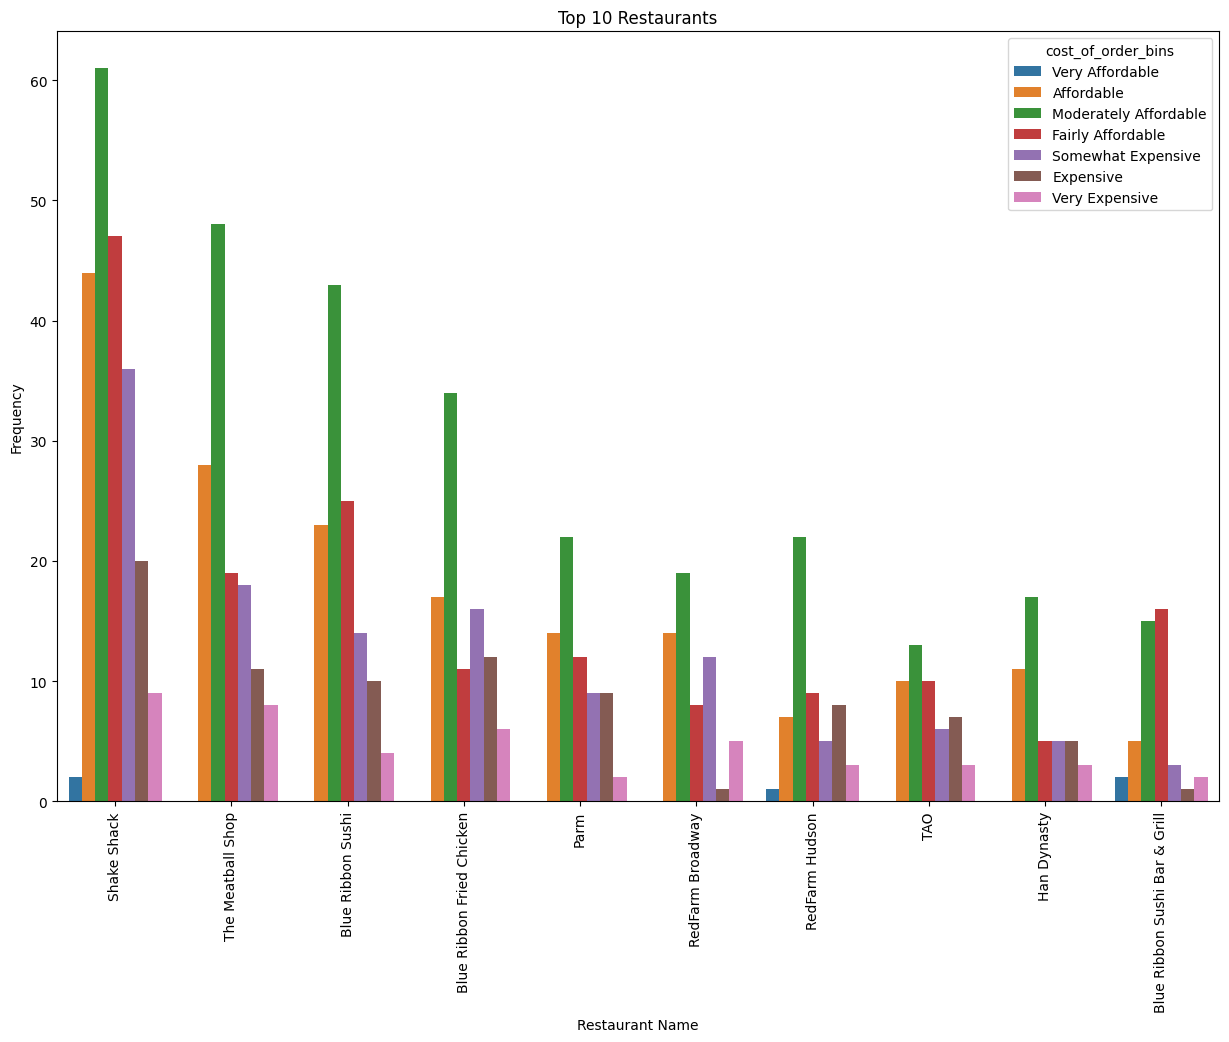

In [148]:
# Analyzing the Cost of Order against the top 10 restaurants
plt.figure(figsize=(15,10))
plt.title('Top 10 Restaurants')
plt.xticks(rotation=90)
plt.xlabel('Restaurant Name');
plt.ylabel('Frequency');
sns.countplot(data=foodhub_records, x='restaurant_name', order=foodhub_records['restaurant_name'].value_counts().iloc[:10].index, hue='cost_of_order_bins');

#### Observation
* The data above is left scewed
* Shake Shack has the highest order cound for moderately affordable foods.
* The data suggest that customers tend to prefer moderately affordable foods over their other counterparts.
* This also suggest that shake shack has been able to adjust their prices to suiit the needs of their customers.

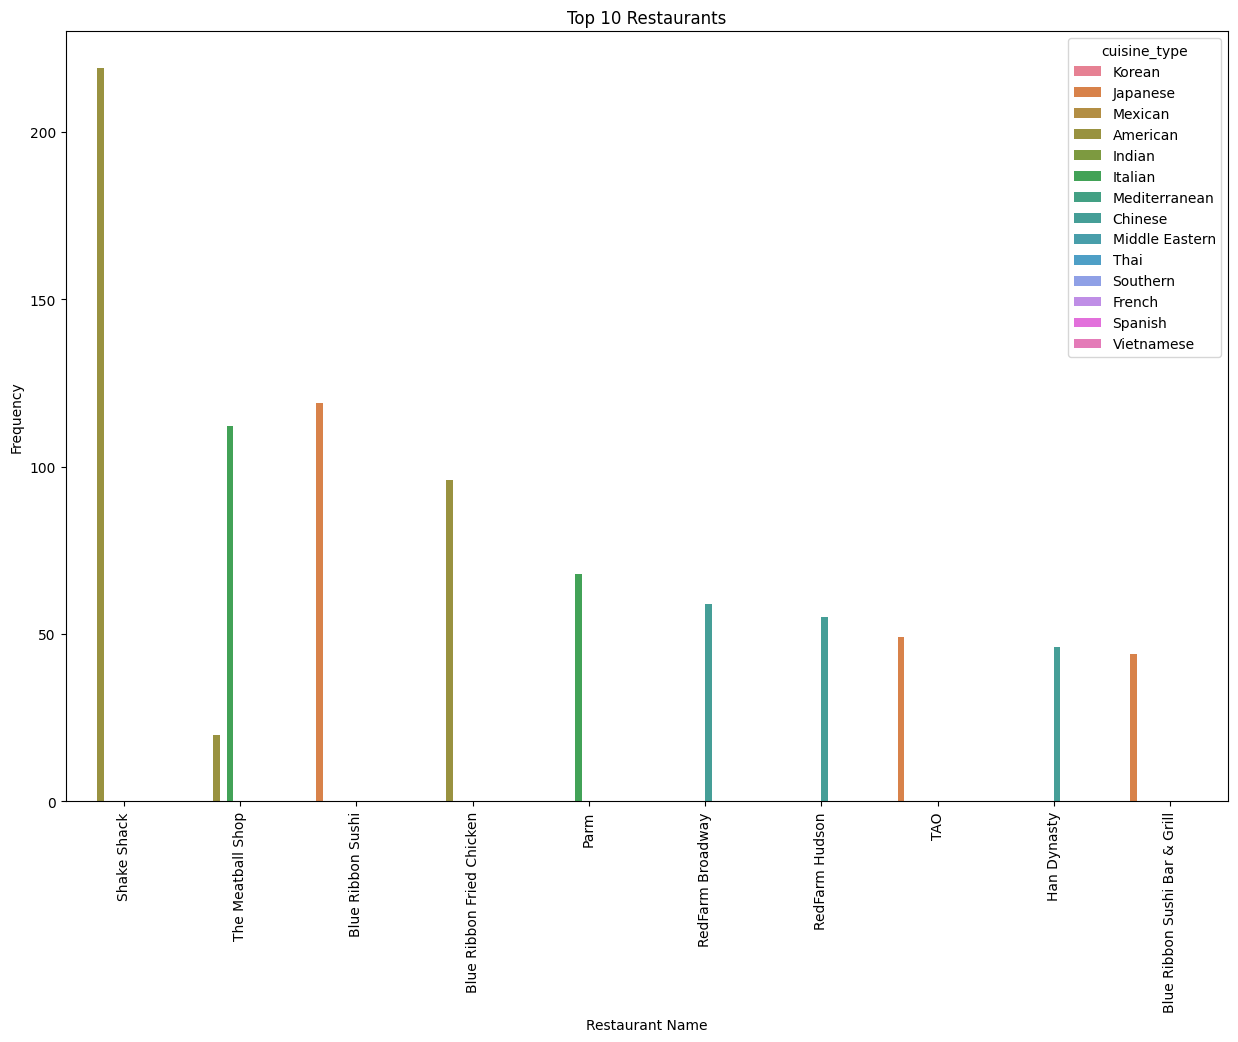

In [149]:
#Most Preferred Cuisine Types grouped by the Top 10 Restaurants
plt.figure(figsize=(15,10))
plt.title('Top 10 Restaurants')
plt.xticks(rotation=90)
plt.xlabel('Restaurant Name');
plt.ylabel('Frequency');
sns.countplot(data=foodhub_records, x='restaurant_name', hue='cuisine_type', order=foodhub_records['restaurant_name'].value_counts().iloc[:10].index);

#### Observation
* The data above shows that Shake Shack has the highest sales of American Cuisine Recorded.
* The suggest that among all the restaurants in the data, shake shack has the most moderately affordable American Cuisine.
* The data is left skewed.
* The reason why the top these restaurants exist in the top 10 is because most moderately affordable top 5 cuisine types.


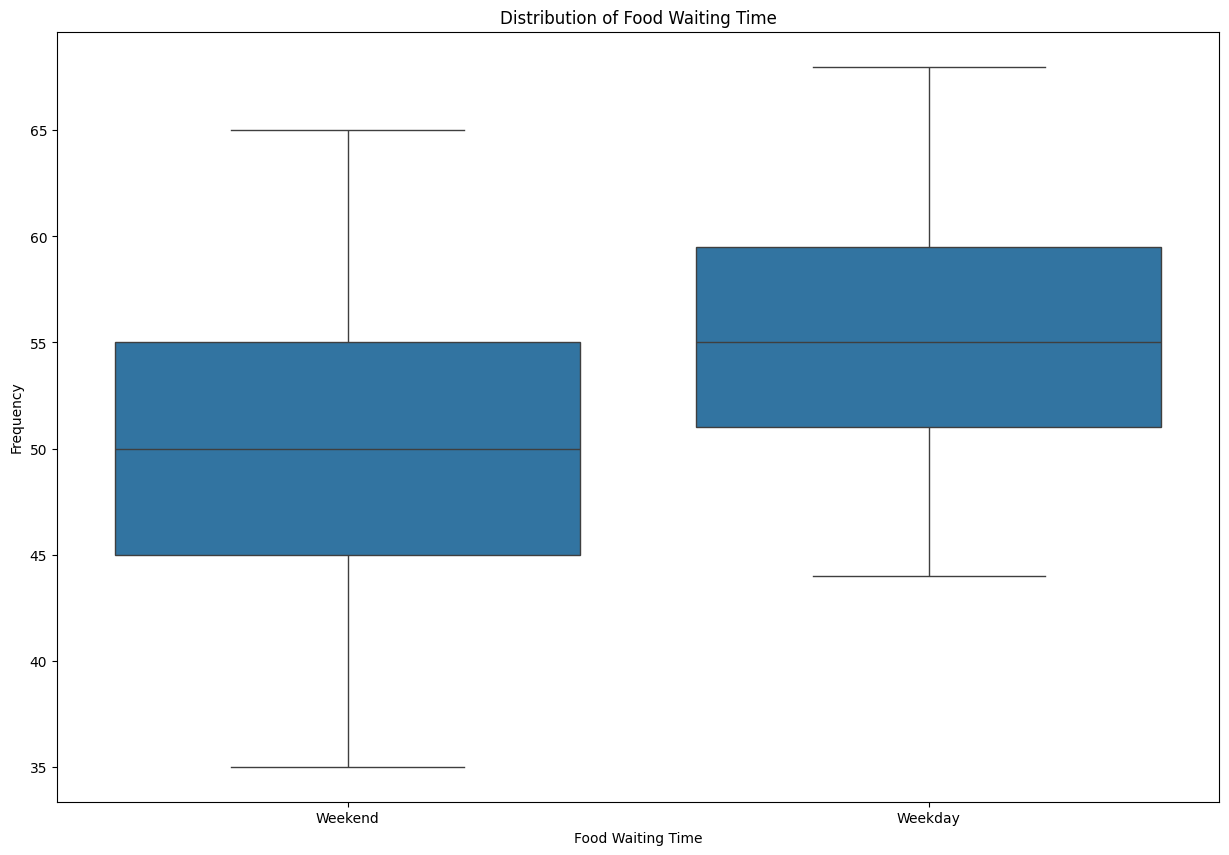

In [150]:
#Analyzing foodwait time and Day of week
plt.figure(figsize=(15,10))
plt.title('Distribution of Food Waiting Time')
plt.xlabel('Food Waiting Time');
plt.ylabel('Frequency');
sns.boxplot(data=foodhub_records, y='food_waiting_time', x="day_of_the_week");

#### Observation
* The data is normally distributed.
* 50% of weekend orders arrive about 10 minutes earlier than 50% of Weekday orders.
* The least time a weekend order took to arrive is about 35 minutes.
* Thd least time a weekday order took to arrive is about 44 minutes.
* Generally, weekend orders take less time to arrive than weekday orders. This may be due the traffic created by people going to work on weekdays.
* The reason why weekend orders are so high could be because they take less time to arrive.

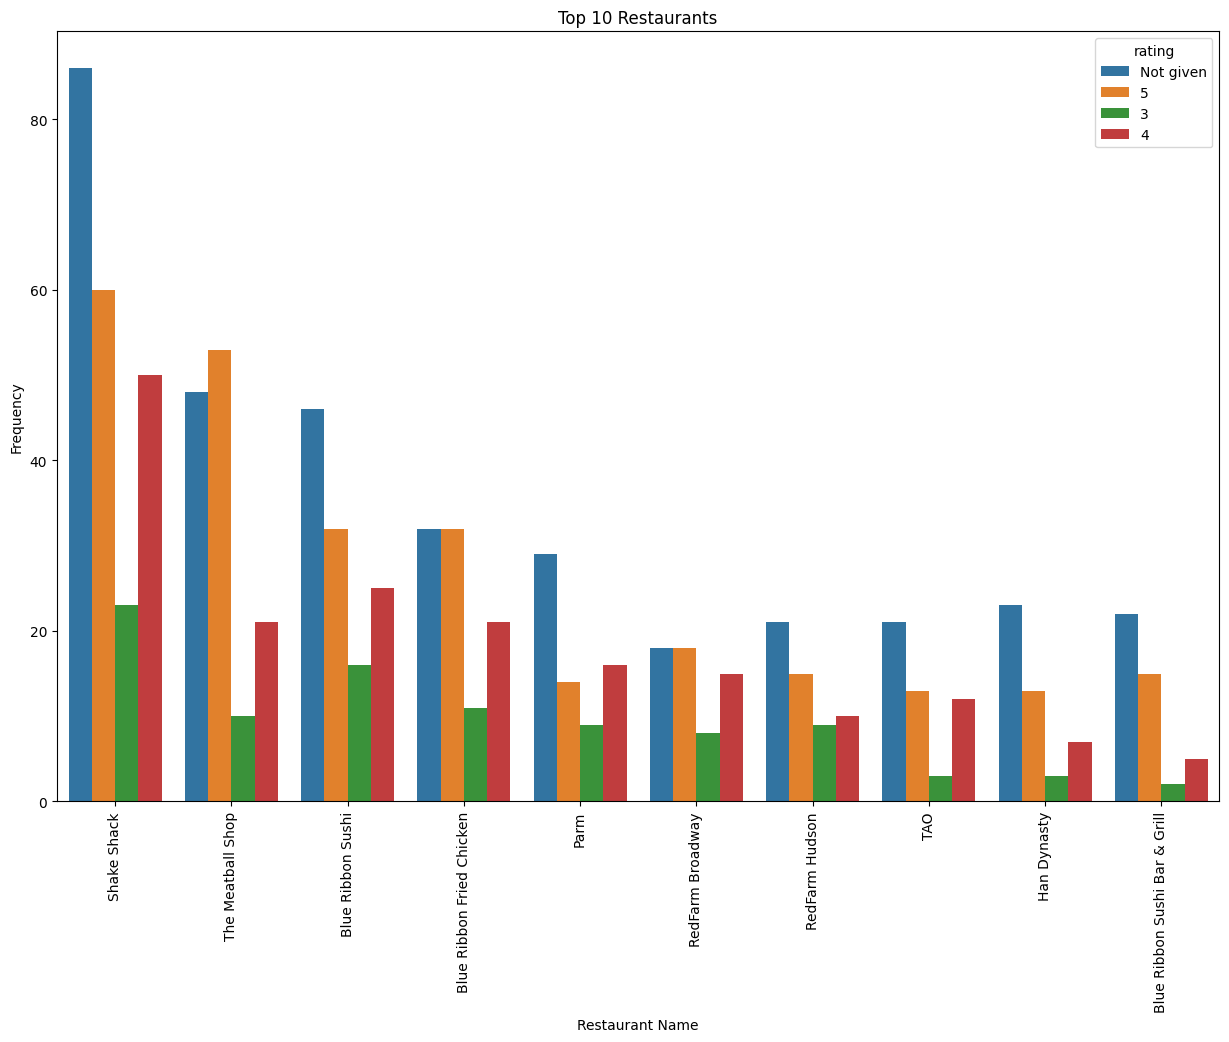

In [151]:
#Restaurant with the most rating
plt.figure(figsize=(15,10))
plt.title('Top 10 Restaurants')
plt.xticks(rotation=90)
plt.xlabel('Restaurant Name');
plt.ylabel('Frequency');
sns.countplot(data=foodhub_records, x='restaurant_name', hue='rating', order=foodhub_records['restaurant_name'].value_counts().iloc[:10].index);

#### Observation
* The data is right skewed.
* Shake Shack is the restaurant with the most rating.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [152]:
#Identifying Restaurants and the Number of Ratings they have
foodhub_records['rating'] = pd.to_numeric(foodhub_records['rating'], errors='coerce') # Converting Ratings Column into Numerical Data
agg_ratings = foodhub_records.groupby('restaurant_name').agg({'rating':['count', 'mean']})# Obtaing the mean and total number of each rating per restaurant

#Applying Condition
agg_ratings = agg_ratings[(agg_ratings[('rating', 'count')] > 50) & (agg_ratings[('rating', 'mean')] > 4)]# if the rating count is greater than 50 and the average rating is greater than 4
agg_ratings

rating          
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905

#### Observations:
The following restaurants fulfill the condition for the promotion offer:

* Blue Ribbon Fried Chicken
* Blue Ribbon Sushi
* Shake Shack
* The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [153]:
# Creating Function to Calculate Profit
def calculate_profit(row):

  if row > 5:
    return row * 0.15 #Charge 15% on the orders having cost greater than 5 dollars
  elif row > 20:
    return row * 0.25 #Charge 25% on the orders having cost greater than 20 dollars
  else:
    return 0 #Charge nothing if the order is below 5 dollars

#Applying Function on Cost of Order Column
foodhub_records['order_charge'] = foodhub_records['cost_of_the_order'].apply(calculate_profit)
foodhub_records.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,food_waiting_time,cost_of_order_bins,order_charge
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45,Very Expensive,4.6125
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48,Moderately Affordable,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51,Moderately Affordable,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40,Expensive,4.3800
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49,Moderately Affordable,1.7385


In [154]:
#Calculating Net Revenue
foodhub_records['order_charge'].sum()

4690.812

#### Observations:
The Net Revenue made by Foodhub is 4690.812 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [155]:
# Write the code here
foodhub_records['food_waiting_time'][foodhub_records['food_waiting_time'] > 60].shape[0]/foodhub_records.shape[0]*100

10.537407797681771

#### Observations:
Only 10% of the orders take more than 60 minutes to deliver.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [156]:
# Write the code here
foodhub_records.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


In [157]:
28.340037 - 22.470022 # Finding the difference

5.870014999999999

#### Observations:
* The mean delivery time only varies by about 5.87 minutes for both weekends and weedays.
* The food arrives faster on weekends than on weekdays

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Majority of the orders placed are on the week ends.
* Customers mostly prefer moderately affordable foods (10 - 15 dollars)
* It takes longer for food to arrive on week days than on weekends
* Alot of people did not bother to leave ratings
* The most prefered restaurant is shake shack which may be because of their moderately affordable American Cuisines.
* The most preferred cuisine is american cuisine.
* Japanese, American, Italian and Chinese Cuisines have the most ratings.
* Shake Shack is the restaurant with the most rating.

### Recommendations:

*  The feedback system has to be reviewed as the number of customers that did not leave a rating is too high. Foodhub should seek for to build a better relationship with customers in order to increase feedback. This could be done by wishing them on thier birthdays, asking them how their day is goings...things that make the customers feel like their needs are actually being taken in to consideration.
* Foodhub should seek to adjust their advertisement to suit the taste of consumers. This can be done by advertising morderately affordable goods since these generate the most profit.
* Under performing restaurants with little to no orders should be consulted or replaced with restaurants on high demand so as to maximize profit.
* Cuisines in the top 10 should be advertised more since they are the most preferred by customers.
* The percentage charged by foodhub should be adjusted to suit the high demand on weekends and the relatively low demand on weekdays..
* Restaurants that have a long food preparation time should be consulted.
* Customers with a high order rated should be given awards in the form of discounts and gifts on birthdays. This is to build a long lasting relationship with customers. These customers should also be consulted more often since they have a higher chance on giving feedback. They can also be made brand abassadors to promote the foodhub business.

---